# Data Analysis for Supermarket Data

## Objectives

- Cleaning and transform raw data
- Perform exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning and maniupulation

In [2]:
df = pd.read_csv('SupermarketData.csv')
df.drop(columns=['Invoice ID'],inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### 1. Null manipulation

In [3]:
print(df.isnull().sum())

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


This dataset doesn't contains null values on any of the columns.

### 2. Duplicates Removal

In [4]:
print("Shape of dataframe before removal: ",df.shape)
df = df.drop_duplicates()
print("Shape of dataframe after removal: ",df.shape)

Shape of dataframe before removal:  (1000, 16)
Shape of dataframe after removal:  (1000, 16)


This dataset does not contain duplicate rows.

## Exploratory Data Analysis

### 1. Gender proportion

Determining proportion of female vs male customers

<AxesSubplot:title={'center':'Female vs Male proportion'}>

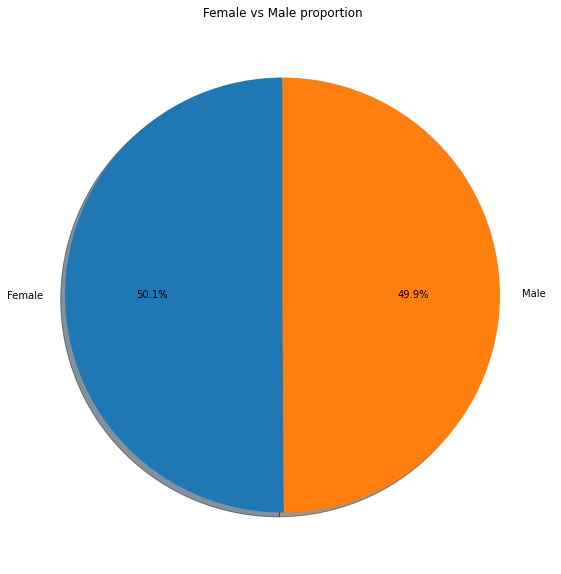

In [5]:
df_gender = df['Gender'].value_counts()
df_gender.plot.pie(figsize=(20,10),shadow=True,startangle=90,ylabel="",
                    title="Female vs Male proportion",autopct='%1.1f%%')

The proportion is almost 50-50 between male and female customers.

### 2. Cities proportion

Determining the proportion of each city on the dataset.

<AxesSubplot:title={'center':'Cities proportion'}>

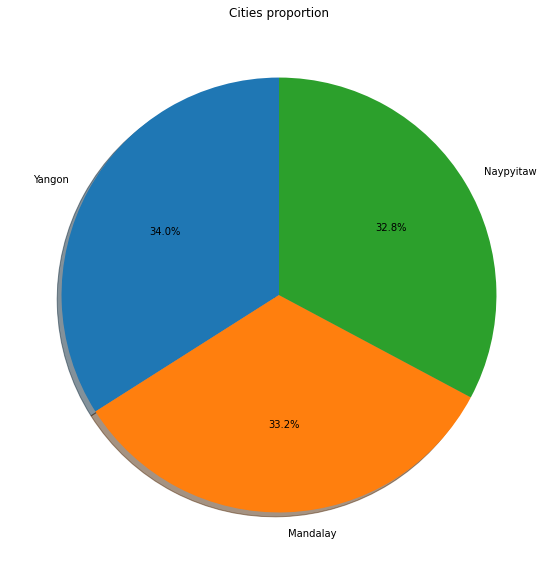

In [6]:
df_cities = df['City'].value_counts()
df_cities.plot.pie(startangle=90,shadow=True,title="Cities proportion",
                    autopct='%1.1f%%',figsize=(20,10),ylabel="")

There are three cities on the dataset, with each having approximately one third of entries.

### 3. Product types proportion

Determining product types proportion on the dataset.

<AxesSubplot:title={'center':'Proudct type proportion'}>

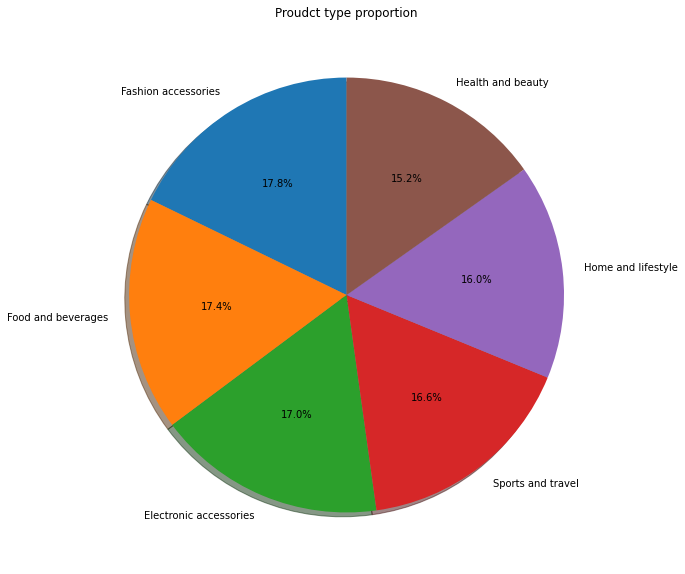

In [7]:
df_products = df['Product line'].value_counts(ascending=False)
df_products.plot.pie(startangle=90,figsize=(20,10),title="Proudct type proportion",
                    shadow=True,autopct='%1.1f%%',ylabel="")

There are 6 categories of product in the dataset. With each having almost the same quantity of entries. The most popular products on the dataset are the ones categorized as "Fashion accesories".

### 4. Customer type proportion

Determining the proportion of customer type in the dataset.

<AxesSubplot:title={'center':'Customer type proportion'}>

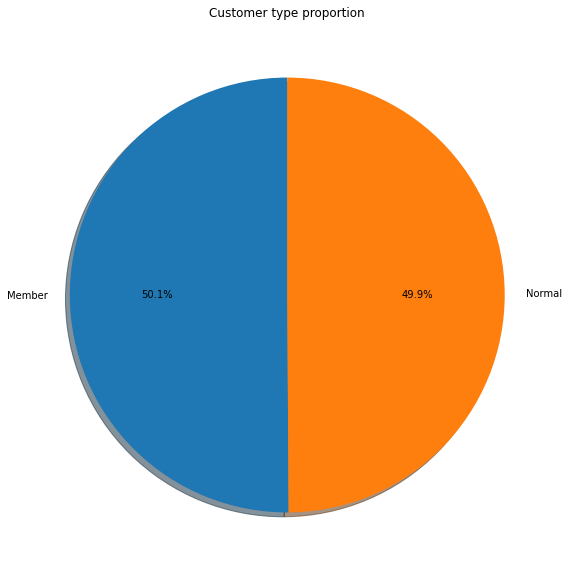

In [8]:
df_customertypes = df['Customer type'].value_counts()
df_customertypes.plot.pie(startangle=90,figsize=(20,10),title="Customer type proportion",
                          ylabel="",autopct='%1.1f%%',shadow=True)

The dataset is almost split 50-50 for each customer type.

### 5. Payment type proportion

Determining the porportion of each payment option.

<AxesSubplot:title={'center':'Payment type proportion'}>

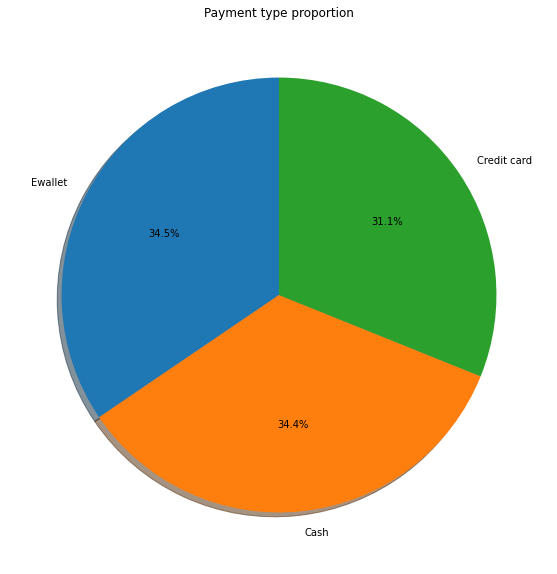

In [9]:
df_paymenttypes = df['Payment'].value_counts(ascending=False)
df_paymenttypes.plot.pie(figsize=(20,10),startangle=90,title="Payment type proportion",
                        shadow=True,ylabel="",autopct='%1.1f%%')

The credit card type is the less frequent among the dataset.

### 6. Branch type proportion

Determing the proportion of each branch type in the dataset.

<AxesSubplot:title={'center':'Branch type proportion'}>

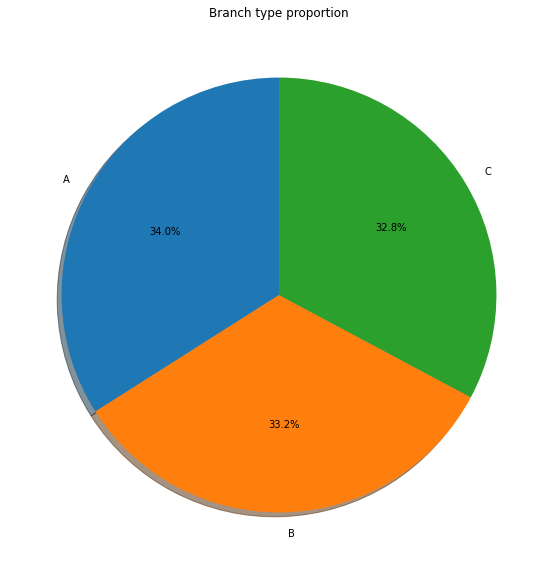

In [10]:
df_branchtypes = df['Branch'].value_counts(ascending=False)
df_branchtypes.plot.pie(figsize=(20,10),title="Branch type proportion",
                        ylabel="",shadow=True,autopct='%1.1f%%',startangle=90)

The dataset is distributed almost evenly for each branch type.

### 7. Numeric values descriptive statistics

Showing descriptive statistics for each numeric column in the dataset.

In [11]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


### 8. Product type mean price

Calculating mean price for each product type.

In [12]:
plt.rc('axes',axisbelow=True)

In [13]:
df_ptypes = df.groupby('Product line').mean()
df_ptypes = df_ptypes[['Total']].sort_values(by='Total',ascending=False)

<AxesSubplot:title={'center':'Product type mean prices'}, xlabel='Product type', ylabel='Mean prices'>

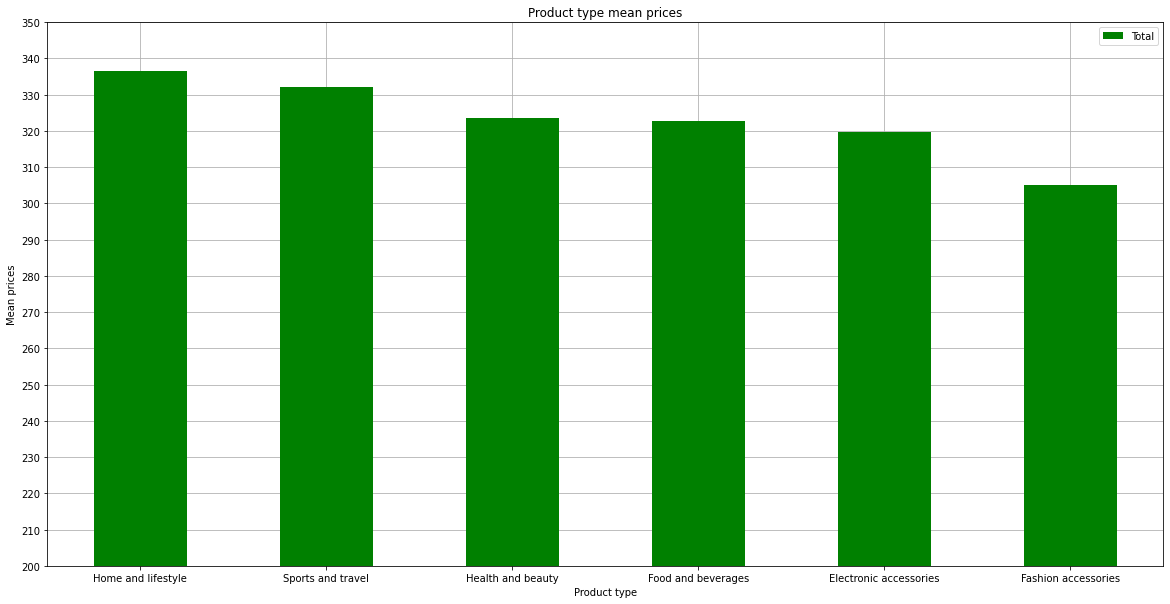

In [14]:
df_ptypes.plot.bar(y='Total',figsize=(20,10),title="Product type mean prices",
                   ylabel="Mean prices",color=['green'],rot=0,xlabel="Product type",
                   grid=True,yticks=np.linspace(200.0,350.0,16),ylim=(200,350))

The chart above shows the mean price of each product category. Due to the amount of each category being almost the same, this then shows the mean price of each category of products. Home and lifestyle products are the most expensive, and fashion accesories are the cheapest.

### 9. Product type mean quantity

Determining the quantity mean for each product type.

In [15]:
df_ptypes = df.groupby('Product line').mean()
df_ptypes = df_ptypes[['Quantity']].sort_values(by='Quantity',ascending=False)

<AxesSubplot:title={'center':'Product category mean quantities'}, xlabel='Product types', ylabel='Mean quantity'>

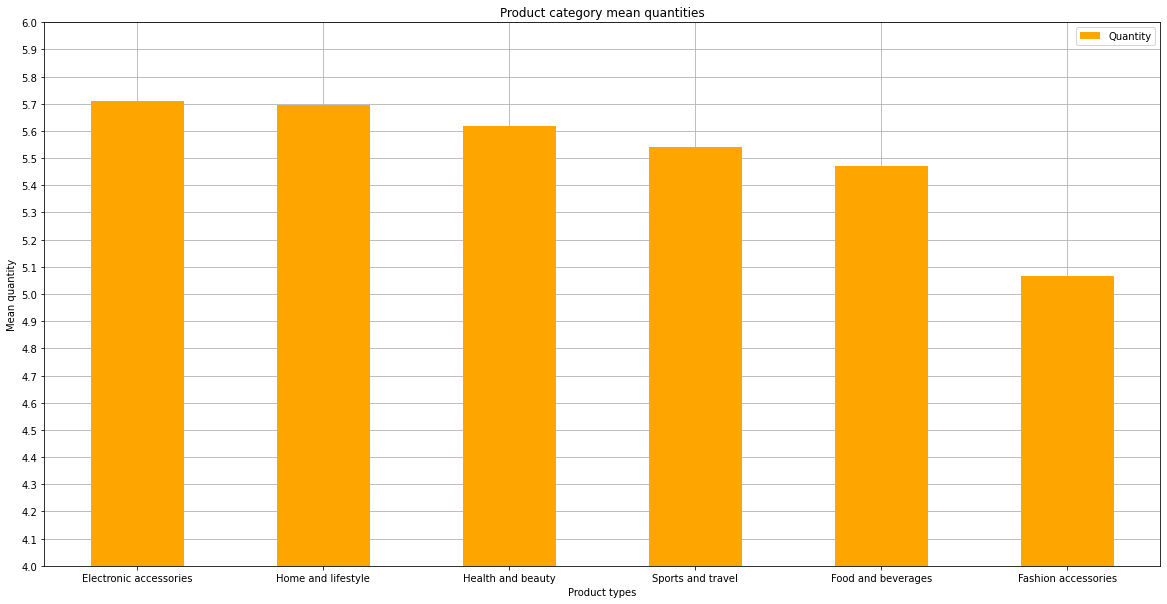

In [16]:
df_ptypes.plot.bar(figsize=(20,10),title="Product category mean quantities",
                    rot=0,ylabel="Mean quantity",xlabel="Product types",ylim=(4.0,6.0),
                    yticks=np.linspace(4.0,6.0,21),grid=True,color=['orange'])

The cart above shows that the mean quanitity for each product cateogory is 5, but it varies by some decimals. The electronic accesories are bought more than fashion accesories.

### 10. Product category mean gross income

Determining the mean gross income for each product type.

In [17]:
df_ptypes = df.groupby('Product line').mean()
df_ptypes = df_ptypes[['gross income']].sort_values(by='gross income',ascending=False)

<AxesSubplot:title={'center':'Prouct types mean gross incomes'}, xlabel='Product type', ylabel='Mean gross income'>

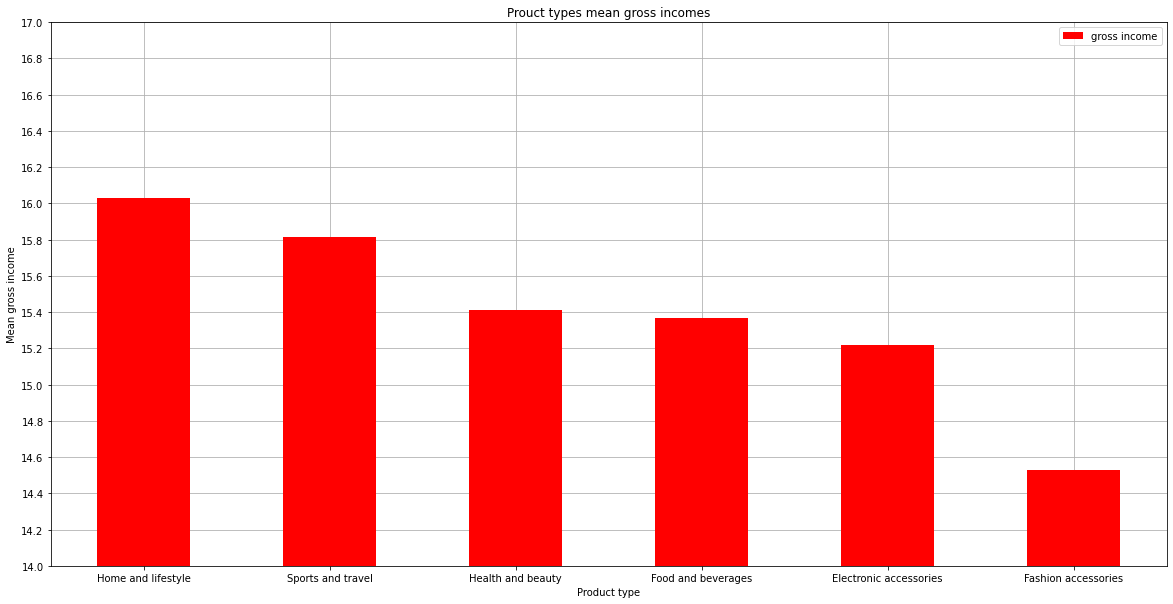

In [18]:
df_ptypes.plot.bar(title="Prouct types mean gross incomes",xlabel="Product type",
                    ylabel="Mean gross income",rot=0,figsize=(20,10),color=['red'],
                    grid=True,yticks=np.linspace(14.0,17.0,16),ylim=(14,17))

The chart above shows that the supermarket's main gross income comes from home and "home and lifestyle" products. This chart correlates with product types mean price chart. This is also obvious, since gross income increases as the price of the product increases.

## Exporting clean data

Since the dataset did not require transformations, it will be left as it is for future visualizations.